In [138]:
# Useful imports
import pandas as pd
import numpy as np
import plotly.express as px

In [54]:
dataset = pd.read_csv("twcs.csv")

In [93]:
# Number of data points from 2010-2016
ten = dataset['created_at'].str.contains(r'2010').sum()
eleven = dataset['created_at'].str.contains(r'2011').sum()
twelve = dataset['created_at'].str.contains(r'2012').sum()
thirteen = dataset['created_at'].str.contains(r'2013').sum()
fourteen = dataset['created_at'].str.contains(r'2014').sum()
fifteen = dataset['created_at'].str.contains(r'2015').sum()
sixteen = dataset['created_at'].str.contains(r'2016').sum()
together = ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen
print(together)

2298


In [105]:
# Remove everything before 2017, as they are outliers
df = dataset[~(dataset['created_at'] < '2017-01-01')]
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [102]:
# Top Twitter users by number of tweets
df['author_id'].value_counts()

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
                 ...  
456282               1
456281               1
456280               1
456276               1
823870               1
Name: author_id, Length: 702777, dtype: int64

In [129]:
Amzn = df['author_id'].str.contains(r"[AmazonHelp]").sum()
Appl = df['author_id'].str.contains(r"[AppleSupport]").sum()
Uber = df['author_id'].str.contains(r"[Uber_Support]").sum()
Spotify = df['author_id'].str.contains(r"[SpotifyCares]").sum()
Delta = df['author_id'].str.contains(r"[Delta]").sum()

In [162]:
from plotly.offline import plot
import plotly.graph_objs as go
top_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Company', '# of Entries'))
top_users


,Company,# of Entries
0,AmazonHelp,1254846
1,AppleSupport,1254137
2,Uber_Support,1239038
3,SpotifyCares,1254299
4,Delta,1239772


In [167]:
px.bar(top_users,x='Company',y='# of Entries')

In [169]:
data = [go.Bar(
x=['AmazonHelp', 'AppleSupport','Uber_Support','SpotifyCares',
'Delta'],
y=[Amzn,Appl,Uber,Spotify,Delta])]
plot(data)

'temp-plot.html'

In [149]:
data = [go.Bar(x= ['AmazonHelp','AppleSupport','Uber_Support','SpotifyCares',
'Delta'],
y=[Amzn, Appl, Uber, Spotify, Delta])]
plot(data)

'temp-plot.html'

In [5]:
# Top authors by response
df['in_response_to_tweet_id'].value_counts()

625011.0     844
776192.0     560
37012.0      297
5965.0       185
87814.0      174
            ... 
1058186.0      1
1058185.0      1
1058183.0      1
1058181.0      1
2987950.0      1
Name: in_response_to_tweet_id, Length: 1774822, dtype: int64

In [98]:
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [97]:
# Find freqency of which day of the wk has most traffic
# Sunday has most, while Friday has least
Mon = df['created_at'].str.contains(r"[Mon]").sum()
Tue = df['created_at'].str.contains(r"[Tue]").sum()
Wed = df['created_at'].str.contains(r"[Wed]").sum()
Thu = df['created_at'].str.contains(r"[Thu]").sum()
Fri = df['created_at'].str.contains(r"[Fri]").sum()
Sat = df['created_at'].str.contains(r"[Sat]").sum()
Sun = df['created_at'].str.contains(r"[Sun]").sum()
Week = [Mon, Tue, Wed, Thu, Fri, Sat, Sun]
print(Week)

[1773955, 1747771, 1018258, 1194943, 454084, 1627582, 1919134]


In [137]:
DOW = pd.DataFrame([('Mon', Mon),("Tue", Tue),('Wed', Wed), 
('Thu', Thu), ('Fri', Fri),('Sat', Sat),('Sun', Sun)],
                   columns=('Day', '# of Entries'))
DOW

,Day,# of Entries
0,Mon,1773955
1,Tue,1747771
2,Wed,1018258
3,Thu,1194943
4,Fri,454084
5,Sat,1627582
6,Sun,1919134


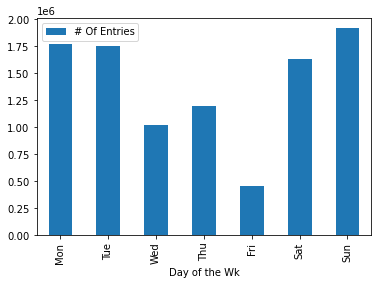

In [166]:
wk = wk.plot.bar(x='Day of the Wk', y='# Of Entries')

In [103]:
# Sort by tweets by date
df['created_at'] = pd.to_datetime(dataset['created_at'])
# dataset['created_at'].count('m')
df.sort_values(by='created_at', ascending = True,inplace=True)
df['created_at']

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
537388    2017-12-03 23:13:00+00:00
531793    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]

In [ ]:
# create a new column with only AmazonHelp
# how to isolate company from data

In [127]:
fig = px.line(df['created_at'], x='date', y="GOOG")
fig.show()

# fig = px.line(x='Month', y="Entries", title="Amazon Support", data_frame=df)
# fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['created_at'] but received: date